# Псевдокод QuickSort($A, l, r$)

In [ ]:
def quick_sort_psevdo(a, l, r):
    if l >= r:
        return
    m = partition(a, l, r)
    quick_sort_psevdo(a, l, m - 1)
    quick_sort_psevdo(a, m + 1, r)

# Partition($A, l, r$)

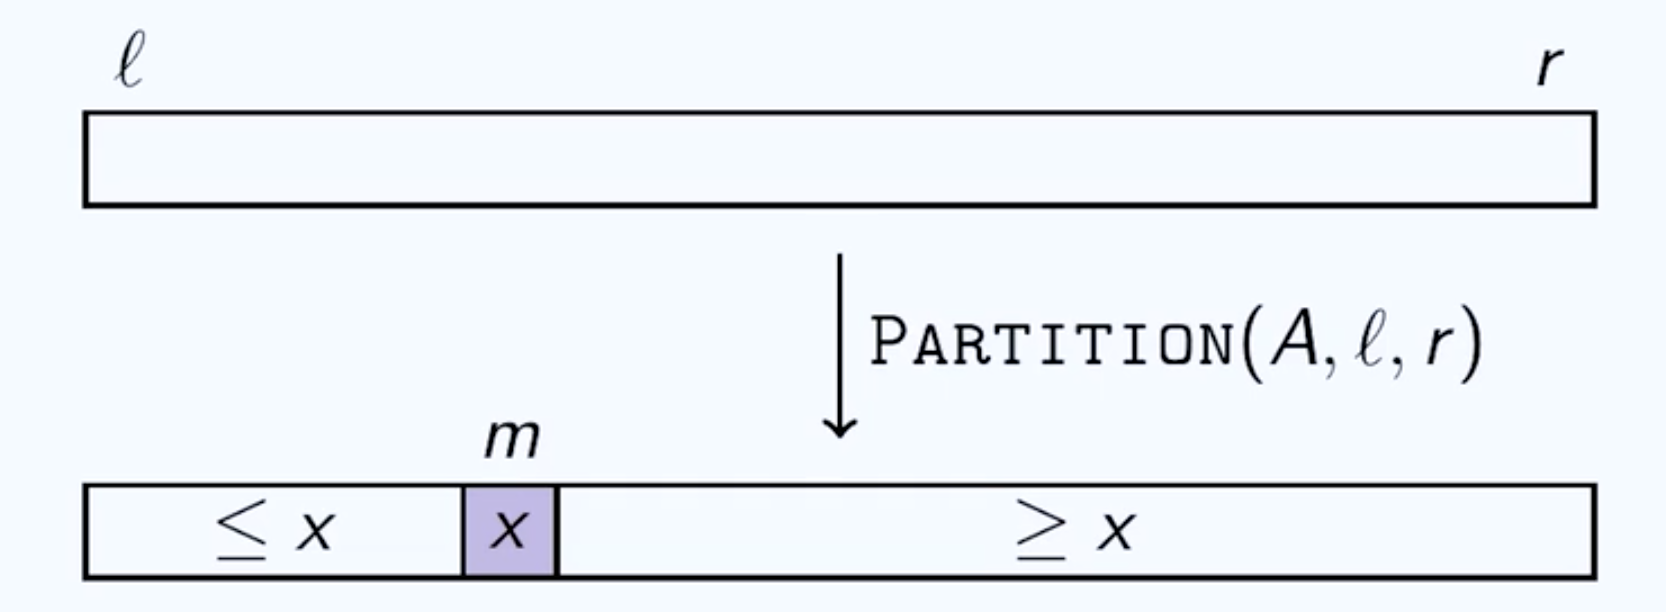

In [1]:
from IPython.display import Image
Image(filename='images/Быстрая сортировка/partition_1.png')

__Идея__. 

- Есть кусок массива от $l$ до $r$, который нам надо отсортировать.

- Когда вызвали Partition($A, l, r$), она переставляет элементы массива так, чтобы на месте $m$ ($m$ - число, которое она возвращает) стоял некоторый элемент $x$, все элементы, которые стоят до него, были $\leq x$, а все правее $\geq x$.

- Таким образом, $x$ уже стоит на своем месте.

- Осталось отсортировать то, что стоит до него, и то, что стоит после него.

# Разбиение: основные идеи

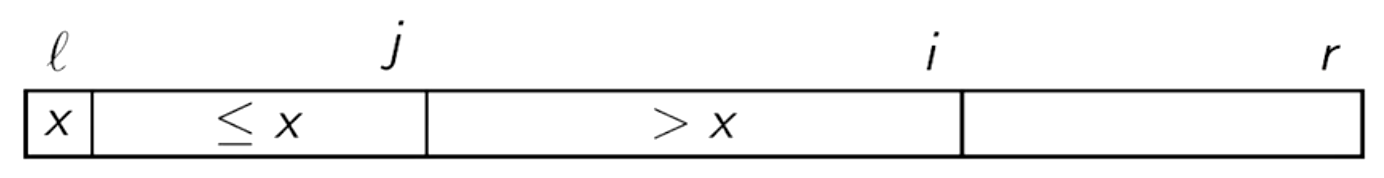

In [2]:
Image(filename='images/Быстрая сортировка/partition_2.png')

- $x = A[l]$ - опорный элемент

- двигаем $i$ от $l+1$ до $r$, поддерживая следующий инвариант:
 - $A[k] \leq x$ для всех $l+1 \leq k \leq j$
 - $A[k] > x$ для всех $j+1 \leq k \leq i$

- пусть $i$ только что увеличился; если $A[i] > x$, не делаем ничего; в противном случае меняем $A[i]$ с $A[j+1]$ и увеличиваем $j$

In [3]:
def partition(a, l, r):
    x = a[l]
    j = l
    for i in range(l + 1, r):
        if a[i] <= x:
            j += 1
            a[j], a[i] = a[i], a[j]
    a[j], a[l] = a[l], a[j]
    return j

## Время работы $O(n) = O(r-l+1)$

# Плохие и хорошие разделители

__Если массив уже отсортирован__.

- $T(n) = T(n-1) + n$:

 - $T(n) = n + (n-1) + (n-2) + \ldots = \Theta(n^2)$
 
__Если опорный элемент встает на 5 место__. То есть слева остается $4$ элемента, а справа $n-5$.

- $T(n) = T(n-5) + T(4) + n$:

 - $T(n) \geq n + (n - 5) + (n-10) + \ldots = \Theta(n^2)$
 
__Если каждый раз массив разбивается примерно пополам__.

- $T(n) = 2T(n/2) + n$:
 
 - $T(n) = O(n\log n)$
 
__Если каждый раз разбивается 1 к 9__.

- $T(n) = T(n/10) + T(9n/10) + n$:

 - $T(n) = O(n\log n)$

# Сбалансированные разбиения

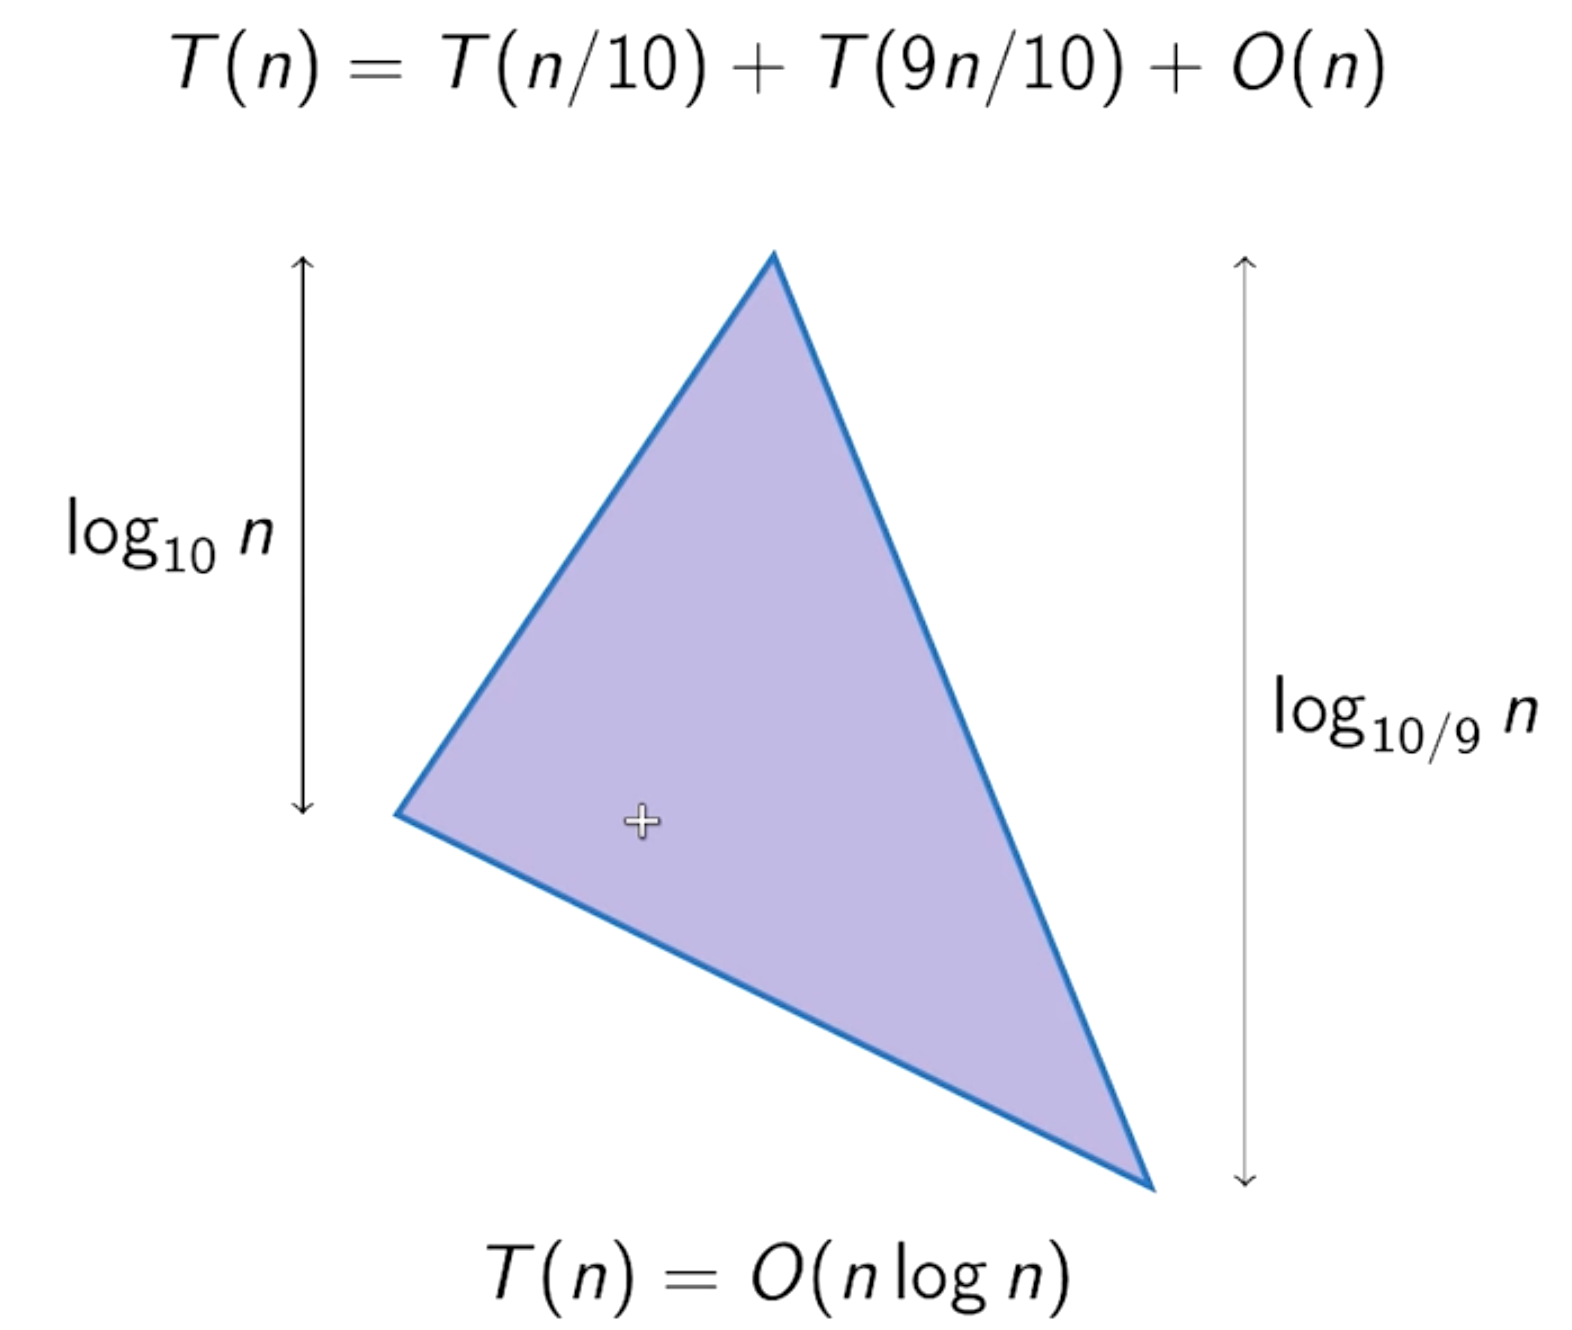

In [4]:
Image(filename='images/Быстрая сортировка/partition_3.png')

Мы хотим, чтобы оба слагаемых были линейны, а не константы.

# Случайный разделитель

- чтобы разбить $A$ относительно случайного разделителя, обменяем $A[l]$ со случайным элементом и вызовем Partition($A,l,r$)

- важное наблюдение: половина элементов $A$ дают сбалансированное разбиение

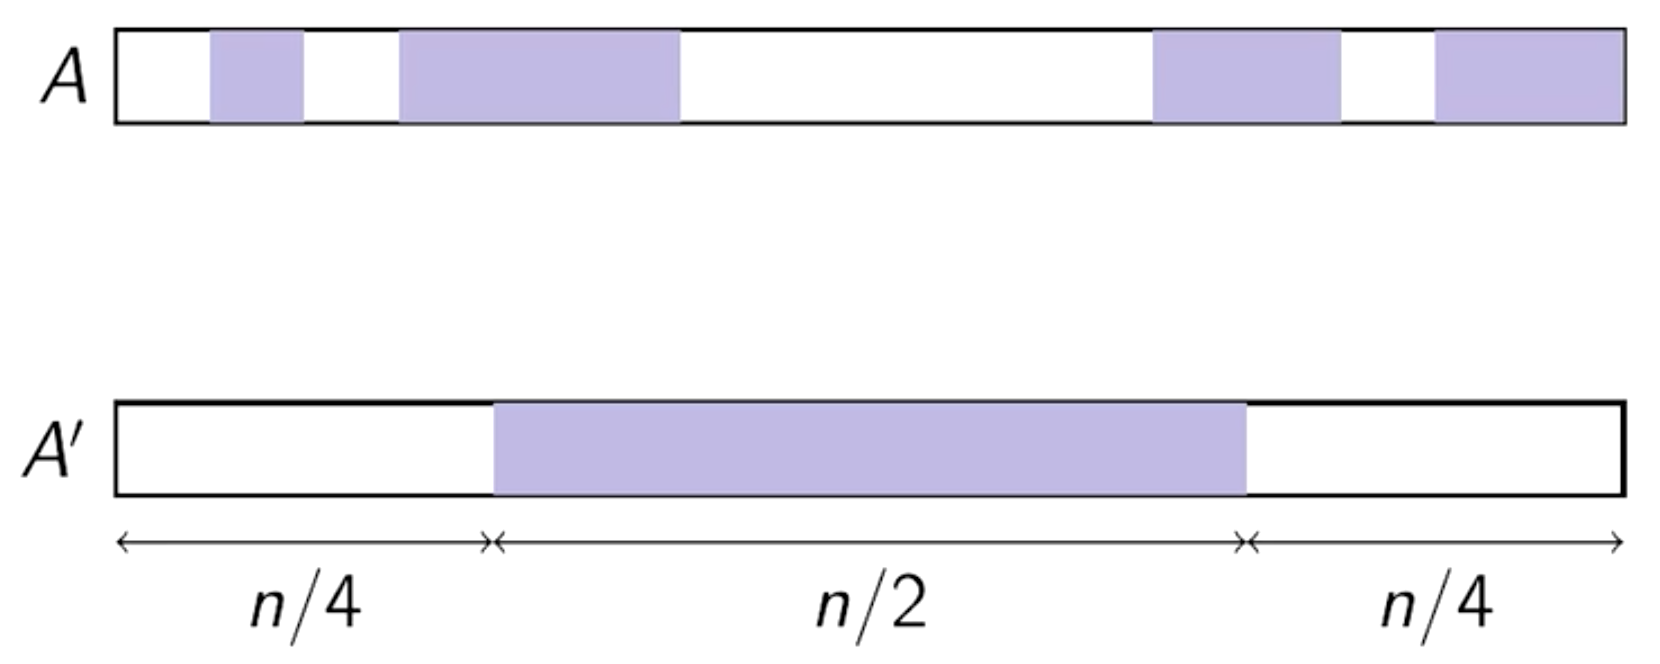

In [5]:
Image(filename='images/Быстрая сортировка/partition_4.png')

# Время работы

__Теорема__. Допустим, что все элементы массива $A$ различны и что разделитель всегда выбирается равномерно случайным образом. Тогда среднее время работы алгоритма QuickSort($A$) есть $O(n\log n)$, в то время как время работы в худшем случае есть $O(n^2)$.

__Замечание__. Усреднение берется по случайным числам алгоритма, а не по входам. То есть для алгоритма нет плохих входов (массивов).

__Идея доказательства__.

- время работы пропорционально количеству сравнений

- сбалансированные разбиения лучше, потому что они лучше уменьшают количество необходимых сравнений

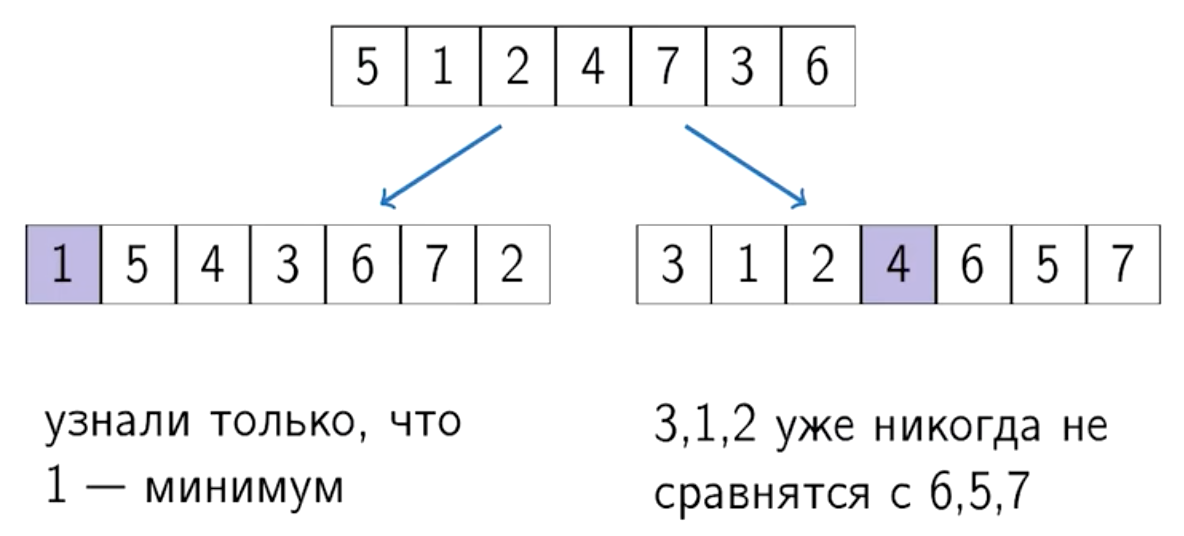

In [6]:
Image(filename='images/Быстрая сортировка/comparison_1.png')

Рассмотрим такой массив $A$ и вероятности, что два каких-то элемента сравнятся.

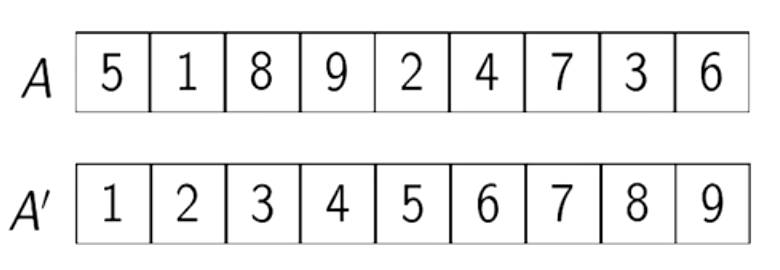

In [8]:
Image(filename='images/Быстрая сортировка/comparison_2.png')

- $P(1\ и\ 9\ сравнятся) = \frac{2}{9}$, это возможно только тогда, когда в качестве самого первого опорного будет взят $1$ или $9$. В противном случае они разъедутся по разным веткам и никогда больше не сравнятся между собой.

- $P(3\ и\ 4\ сравнятся) = 1$, так как никакой другой элемент массива не даст алгоритму понять, как относительно друг друга должны стоять $3$ и $4$.

- Интуитивно: чем дальше друг от друга стоят два элемента в отсортированном массиве, тем меньше вероятность, что они сравнятся.

__Доказательство__.

- для $i < j$ введем такую случаную величину $$\chi_{ij} = \begin{cases}
1&\text{$A'[i], A'[j]$ сравнились}\\
0&\text{в противном случае}\\
\end{cases}$$

- для $i < j$ элементы $A'[i]$ и $A'[j]$ либо сравниваются ровно один раз, либо не сравниваются вообще (мы всегда сравниваем с разделителем)

- это, в частности, означает, что время работы в худшем случае не больше $O(n^2)$ (всего пар $\frac{n(n-1)}{2}$ и для каждой максимум $1$ сравнение)

- __важное замечание__: $\chi_{ij} = 1$ если и только если первый разделитель, выбранный из $A'[i\ldots j]$, - это $A'[i]$ или $A'[j]$

- тогда $P(\chi_{ij} = 1) = \frac{2}{j - i + 1}$ и $E(\chi_{ij}) = \frac{2}{j - i + 1}$

- тогда среднее время работы есть:
$$E\sum\limits_{i=1}^{n}\sum\limits_{j=i+1}^{n}\chi_{ij} = \sum\limits_{i=1}^{n}\sum\limits_{j=i+1}^{n}E(\chi_{ij}) =\sum\limits_{i<j}\frac{2}{j-i+1} \leq 2n \cdot (\frac{1}{2} + \frac{1}{3} + \ldots + \frac{1}{n}) = \Theta(n\log n)$$

# Равные элементы

- если все элементы массива равны между собой, то рассмотренная реализация алгоритма быстрой сортировки будет работать квадратичное время

- чтобы обойти это препятствие, массив можно разбить на три части вместо двух: $<x, =x, >x$

# Элиминация хвостовой рекурсии

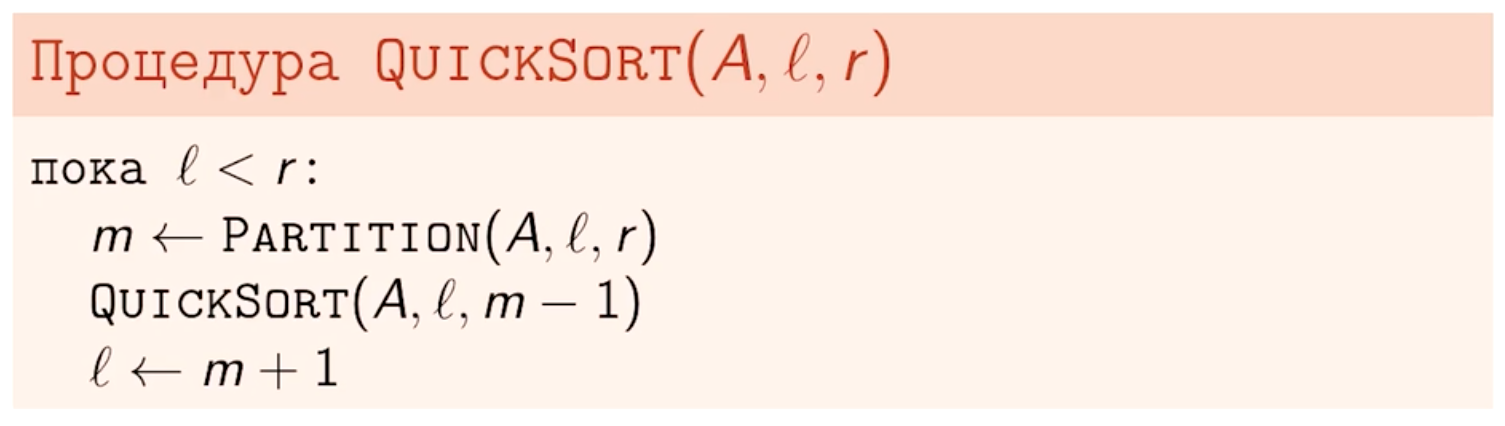

In [11]:
Image(filename='images/Быстрая сортировка/elimination_1.png')

Элиминируя рекурсивный вызов для более длинного массива, мы гарантируем, что глубина рекурсии (а значит, и дополнительная память) будет в худшем случае не более $O(\log n)$. Так что правильнее было бы в псевдокоде сначала найти длинный кусок и его элиминировать.

# Интроспективная сортировка: $O(n\log n)$ в худшем случае

- запускает быструю сортировку с простой эвристикой выбора разделителя (например, медиана из первого, среднего и последнего элементов)

- если глубина рекурсии превышает порог $c \log n$, быстрая сортировка прерывается и запускается алгоритм с гарантированным временем $O(n\log n)$ в худшем случае (например, сортировка кучей)

# Заключение

- Быстрая сортировка работает за время $O(n\log n)$ в среднем случае и за $O(n^2)$ в худшем случае.

- Усреднение берется по случайным числам алгоритма, но не по входам.

- Очень эффективен на практике.

- Если в массиве могут быть равные числа, стоит использовать 3-разбиение вместо 2-разбиения.

- Элиминация хвостовой рекурсии позволяет сделать так, чтобы алгоритм быстрой сортировки использовал не более $O(n\log n)$ дополнительной памяти.

# Реализация QuickSort 2-разбиения

In [25]:
def partition_2(a, l, r):
    pivot = a[l]
    j = l
    for i in range(l + 1, r):
        if a[i] <= pivot:
            j += 1
            a[j], a[i] = a[i], a[j]
    a[j], a[l] = a[l], a[j]
    return j


def quick_sort_2(a, l, r):
    if l >= r:
        return
    
    m = partition_2(a, l, r)
    
    quick_sort_2(a, l, m)
    quick_sort_2(a, m + 1, r)
    
a = [7, 6, 7, 4, 3, 5]  
# a = [78, 41, 4, 27, 3, 27, 8, 39, 19, 34, 6, 41, 13, 52, 16]
quick_sort_2(a, 0, len(a))
print(a)

[3, 4, 5, 6, 7, 7]


# Реализация QuickSort 3-разбиения

In [13]:
def partition_3(a, l, r):
    pivot = a[l]
    lt = l
    gt = r
    i = l + 1
    while i <= gt:
        if a[i] < pivot:
            a[lt], a[i] = a[i], a[lt]
            lt += 1
            i += 1
        elif a[i] > pivot:
            a[gt], a[i] = a[i], a[gt]
            gt -= 1
        else:
            i += 1

    return lt, gt


def quick_sort_3(a, l, r):
    if l >= r:
        return
    
    lt, gt = partition_3(a, l, r)
    
    quick_sort_3(a, l, lt - 1)
    quick_sort_3(a, gt + 1, r)
    
a = [7, 6, 7, 4, 3, 5, 3, 3, 3, 5, 6, 5, 6, 7, 7, 7, 4]  
# a = [78, 41, 4, 27, 3, 27, 8, 39, 19, 34, 6, 41, 13, 52, 16]
quick_sort_3(a, 0, len(a) - 1)
print(a)

[3, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7]


# Задача: точки и отрезки

В первой строке задано два целых числа $1 \leq n \leq 50000$ и $1 \leq m \leq 50000$ — количество отрезков и точек на прямой, соответственно. Следующие $n$ строк содержат по два целых числа $a_i, b_i$ $(a_i \leq b_i)$ — координаты концов отрезков. Последняя строка содержит $m$ целых чисел — координаты точек. Все координаты не превышают $10^8$ по модулю. Точка считается принадлежащей отрезку, если она находится внутри него или на границе. Для каждой точки в порядке появления во вводе выведите, скольким отрезкам она принадлежит.

In [15]:
import random


def compare_min(a, b):
    return a < b


def compare_min_or_equal(a, b):
    return a <= b


def binary_search(a, k, comparator):
    l, r = 0, len(a) - 1
    count = 0
    while l <= r:
        m = (l + r) // 2
        if comparator(a[m], k):
            count += m + 1 - l
            l = m + 1
        else:
            r = m - 1
            
    return count


def partition_3(a, l, r):
    pivot = a[l]
    lt = l
    gt = r
    i = l + 1
    while i <= gt:
        if a[i] < pivot:
            a[lt], a[i] = a[i], a[lt]
            lt += 1
            i += 1
        elif a[i] > pivot:
            a[gt], a[i] = a[i], a[gt]
            gt -= 1
        else:
            i += 1

    return lt, gt


def quick_sort_3(a, l, r):
    if l >= r:
        return
    
    k = random.randint(l, r)
    a[l], a[k] = a[k], a[l]
    
    lt, gt = partition_3(a, l, r)
    
    quick_sort_3(a, l, lt - 1)
    quick_sort_3(a, gt + 1, r)
    

def solver(starts, ends, points):
        
    quick_sort_3(starts, 0, len(starts) - 1)
    quick_sort_3(ends, 0, len(ends) - 1)

    point_counts = {}
    
    for el in points:
        point_counts[el] = -1
    
    count_left = 0
    
    for p in points:
        if point_counts[p] == -1:
            """
            n - сколько точек из starts <= p
            m - сколько точек из ends < p
            """
            n = binary_search(starts, p, compare_min_or_equal)
            m = binary_search(ends, p, compare_min)
            if n - m > 0:
                point_counts[p] = n - m
            else:
                point_counts[p] = 0
    
    res = [point_counts[points[i]] for i in range(len(points))]
    
    return res


def main():
    n, m = [int(i) for i in input().split()]
    
    segments = [tuple(map(int, input().split())) for _ in range(n)]

    starts = [el[0] for el in segments]
    ends = [el[1] for el in segments]

    points = [int(el) for el in input().split()]
    
    print(*solver(starts, ends, points))
    
main()

2 3
0 5
7 10
1 6 11
1 0 0
